### HIV Prevalence: Trends and Predictors
By Christopher Meyer

[Project Webpage](cmeyer555.github.io)

## Project Goals
The purpose of this project is to determine the ways that social attitudes can predict access to care for HIV/AIDS (H/A) or the lack thereof. Also of import is trends in HIV/AIDS (H/A) diagnosis and care. H/A disproportionately affects LGBT people, and as such, there are often sociopolitical discourses that seek to stigmatize those suffering from H/A, leading to barriers to treatment. I will be using the CDCs data for H/A statistics throughout the country. Regarding social attitudes, I plan to use the General Society Survey from the University of Chicago.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
!git clone https://github.com/cmeyer555/cmeyer555.github.io.git
%cd cmeyer555.github.io/
!ls
[Link Text](https://example.com)

Cloning into 'cmeyer555.github.io'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 342.90 KiB | 7.79 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/cmeyer555.github.io/cmeyer555.github.io/cmeyer555.github.io/cmeyer555.github.io/cmeyer555.github.io
AtlasPlusTableData.csv	AtlasPlusTableData.xlsx  index.html  README.md


## Dataset 1
This dataset originates from the Centers for Disease Control and Prevention HIV data repository, which compiles official surveillance and survey data on HIV in the United States. It draws primarily from the National HIV Surveillance System- the primary source for monitoring HIV cases and trends in the U.S.. The inclusion of data from NHSS means the dataset is highly credible and widely used by public health officials and researchers to track the HIV epidemic. The CDC's role and the rigorous data collection processes (e.g. mandatory case reporting by states) ensure the data's authority and reliability for epidemiological analysis. With this dataset I can track H/A prevalence/diagnoses over time, as well as by region, which can then be compared with social attitudes in the same time period / geographic region.

In [98]:
df = pd.read_excel("AtlasPlusTableData.xlsx", engine="openpyxl")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean 'year' column
df["year"] = df["year"].astype(str).str.extract("(\d{4})").astype(int)

# Convert 'cases' to numeric + remove commas
df["cases"] = pd.to_numeric(df["cases"].astype(str).str.replace(",", ""), errors="coerce")

# Rename rate column
df.rename(columns={"rate_per_100000_(95%_ci)": "rate_per_100k"}, inplace=True)

df.head(20)


,indicator,year,geography,fips,cases,rate_per_100k,percent
0,Receipt of HIV medical care,2018,Alabama,1,10037.0,NaN,77.4
1,PrEP coverage and number of persons prescribed,2018,Alabama,1,1539.0,NaN,14
2,HIV prevalence,2018,Alabama,1,13375.0,325.4,NaN
3,AIDS prevalence,2018,Alabama,1,5864.0,142.7,NaN
4,Receipt of HIV medical care,2019,Alabama,1,10325.0,NaN,78
5,PrEP coverage and number of persons prescribed,2019,Alabama,1,1835.0,NaN,16.7
6,HIV prevalence,2019,Alabama,1,13765.0,333.4,NaN
7,AIDS prevalence,2019,Alabama,1,6008.0,145.5,NaN
8,Receipt of HIV medical care,2020,Alabama,1,10272.0,NaN,75.6
9,PrEP coverage and number of persons prescribed,2020,Alabama,1,1910.0,NaN,17.3


This data is quite messy, with the thing being measured as its own column. Let's split the dataframe into several separate ones, separating the dataframe by the variable being measured, here designated in the "indicator" column

In [99]:
indicator_values = df['indicator'].unique()
indicator_dfs = {}

# Iterate through unique indicator values (variables) and create DataFrames
for indicator in indicator_values:
    indicator_dfs[indicator] = df[df['indicator'] == indicator].copy()
    # We wont need the indicator column anymore, so that should be dropped
    indicator_dfs[indicator] = indicator_dfs[indicator].drop(columns=['indicator'])


# Access individual DataFrames using the indicator value as the key

For now, I'm only interested in HIV diagnoses and prevalence rate

In [100]:
hiv_diagnoses_df = indicator_dfs['HIV diagnoses']
hiv_prevalence_df = indicator_dfs['HIV prevalence']
hiv_prevalence_df.head()

,year,geography,fips,cases,rate_per_100k,percent
2,2018,Alabama,1,13375.0,325.4,NaN
6,2019,Alabama,1,13765.0,333.4,NaN
10,2020,Alabama,1,14030.0,330.6,NaN
14,2021,Alabama,1,14336.0,335.9,NaN
18,2022,Alabama,1,14761.0,343.8,NaN


Now, using this tidy data, let's chart national HIV statistics over time

In [101]:
# Group by year, sum the cases from each year
national_diagnoses = hiv_diagnoses_df.groupby("year")["cases"].sum().reset_index()
national_prevalence = hiv_prevalence_df.groupby("year")["cases"].sum().reset_index()

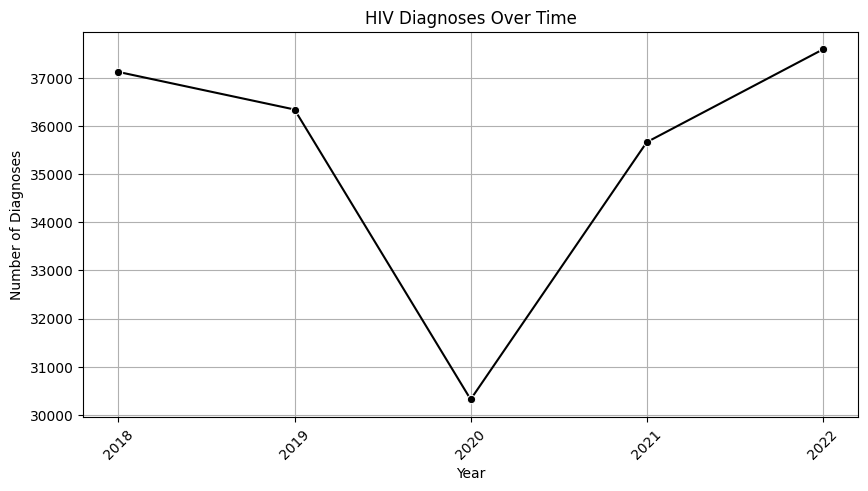

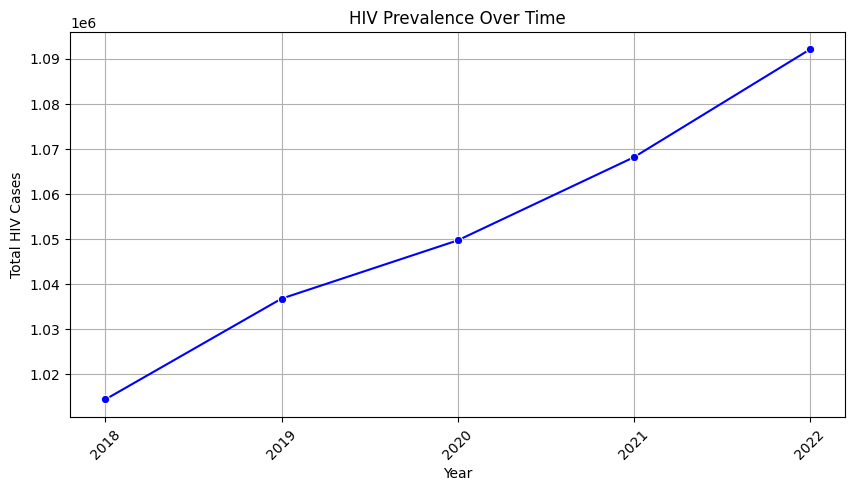

In [90]:
# Plot 1: HIV Diagnoses Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=national_diagnoses, x="year", y="cases", marker="o", color="black")
plt.title("HIV Diagnoses Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.xticks(national_diagnoses["year"], rotation=45)
plt.grid(True)
plt.show()

# Plot 2: HIV Prevalence Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=national_prevalence, x="year", y="cases", marker="o", color="blue")
plt.title("HIV Prevalence Over Time")
plt.xlabel("Year")
plt.ylabel("Total HIV Cases")
plt.xticks(national_prevalence["year"], rotation=45)
plt.grid(True)
plt.show()

Yikes! looks like people weren't able to access STI testing due to COVID. We've already been able to identify a huge barrier to healthcare in this simple exploratory data analysis. Do HIV rates differ geographically? This is important as I'll be using state-level attitude data when synthesizing the HIV data with social data. Let's compare New York to Louisiana

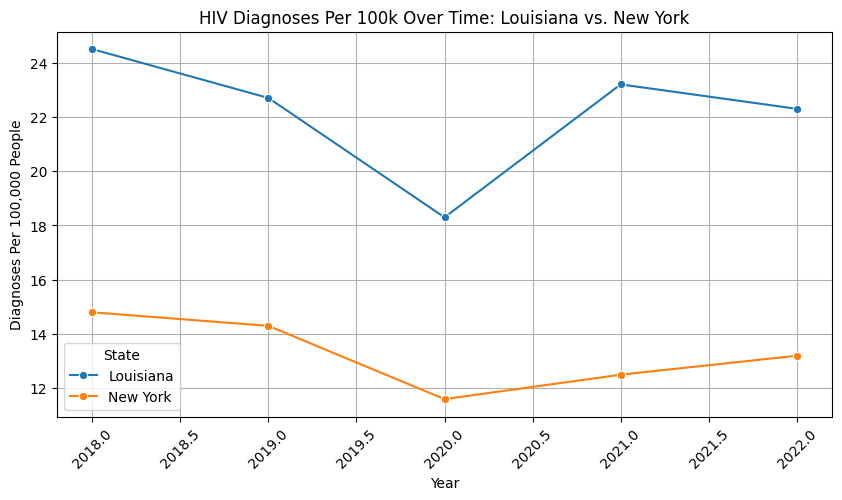

In [97]:
selected_states = ["Louisiana", "New York"]

# Group by year and geography, using rate per 100k instead of total cases as the population sizes differ
state_trends = hiv_diagnoses_df.groupby(["year", "geography"])['rate_per_100k'].mean().reset_index()

# Filter the data to include only selected states
filtered_state_trends = state_trends[state_trends['geography'].isin(selected_states)]

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_state_trends, x="year", y='rate_per_100k', hue="geography", marker="o")  # Pass 'rate_per_100k' as a string here as well

# Formatting
plt.title("HIV Diagnoses Per 100k Over Time: Louisiana vs. New York")
plt.xlabel("Year")
plt.ylabel("Diagnoses Per 100,000 People")
plt.legend(title="State")
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

There's a striking difference between Louisiana and New York in terms of diagnoses. This leads cleanly to further analyses: what differences between the states can explain such a wide gap?

In [121]:
!jupyter nbconvert --to html CMPS6160_M1.ipynb

[NbConvertApp] WARNING | pattern 'CMPS6160_M1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   